# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
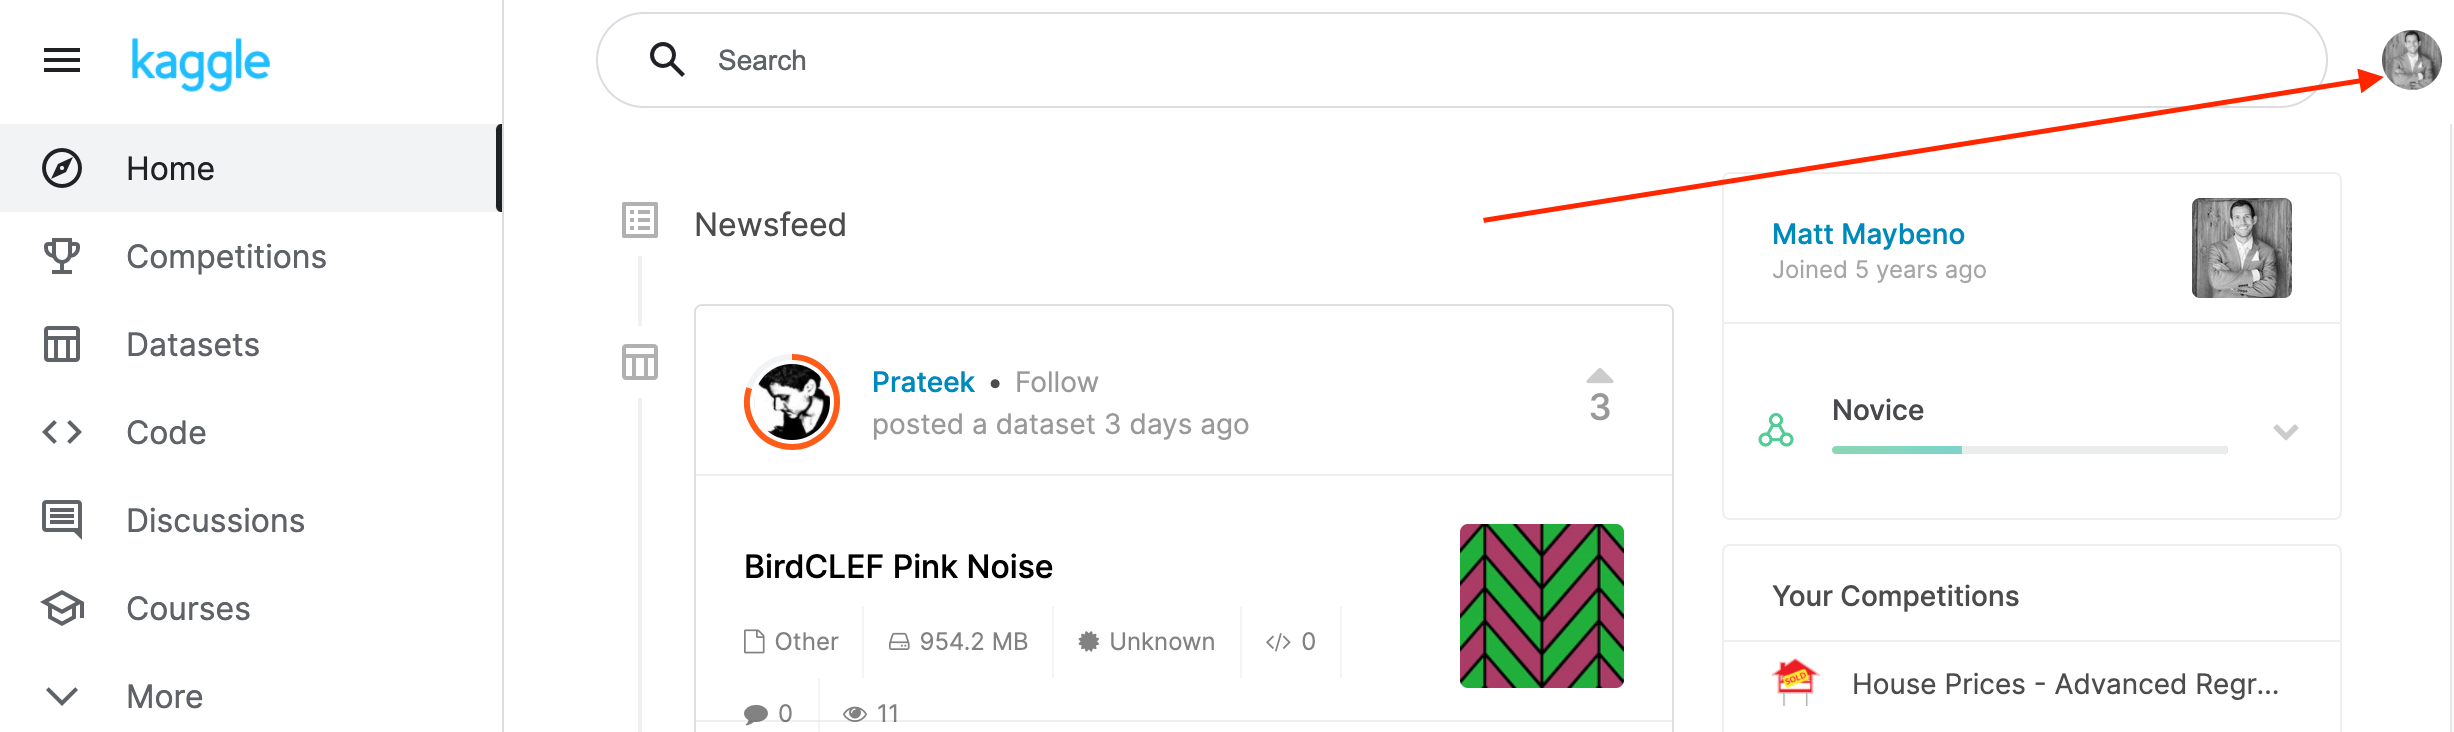
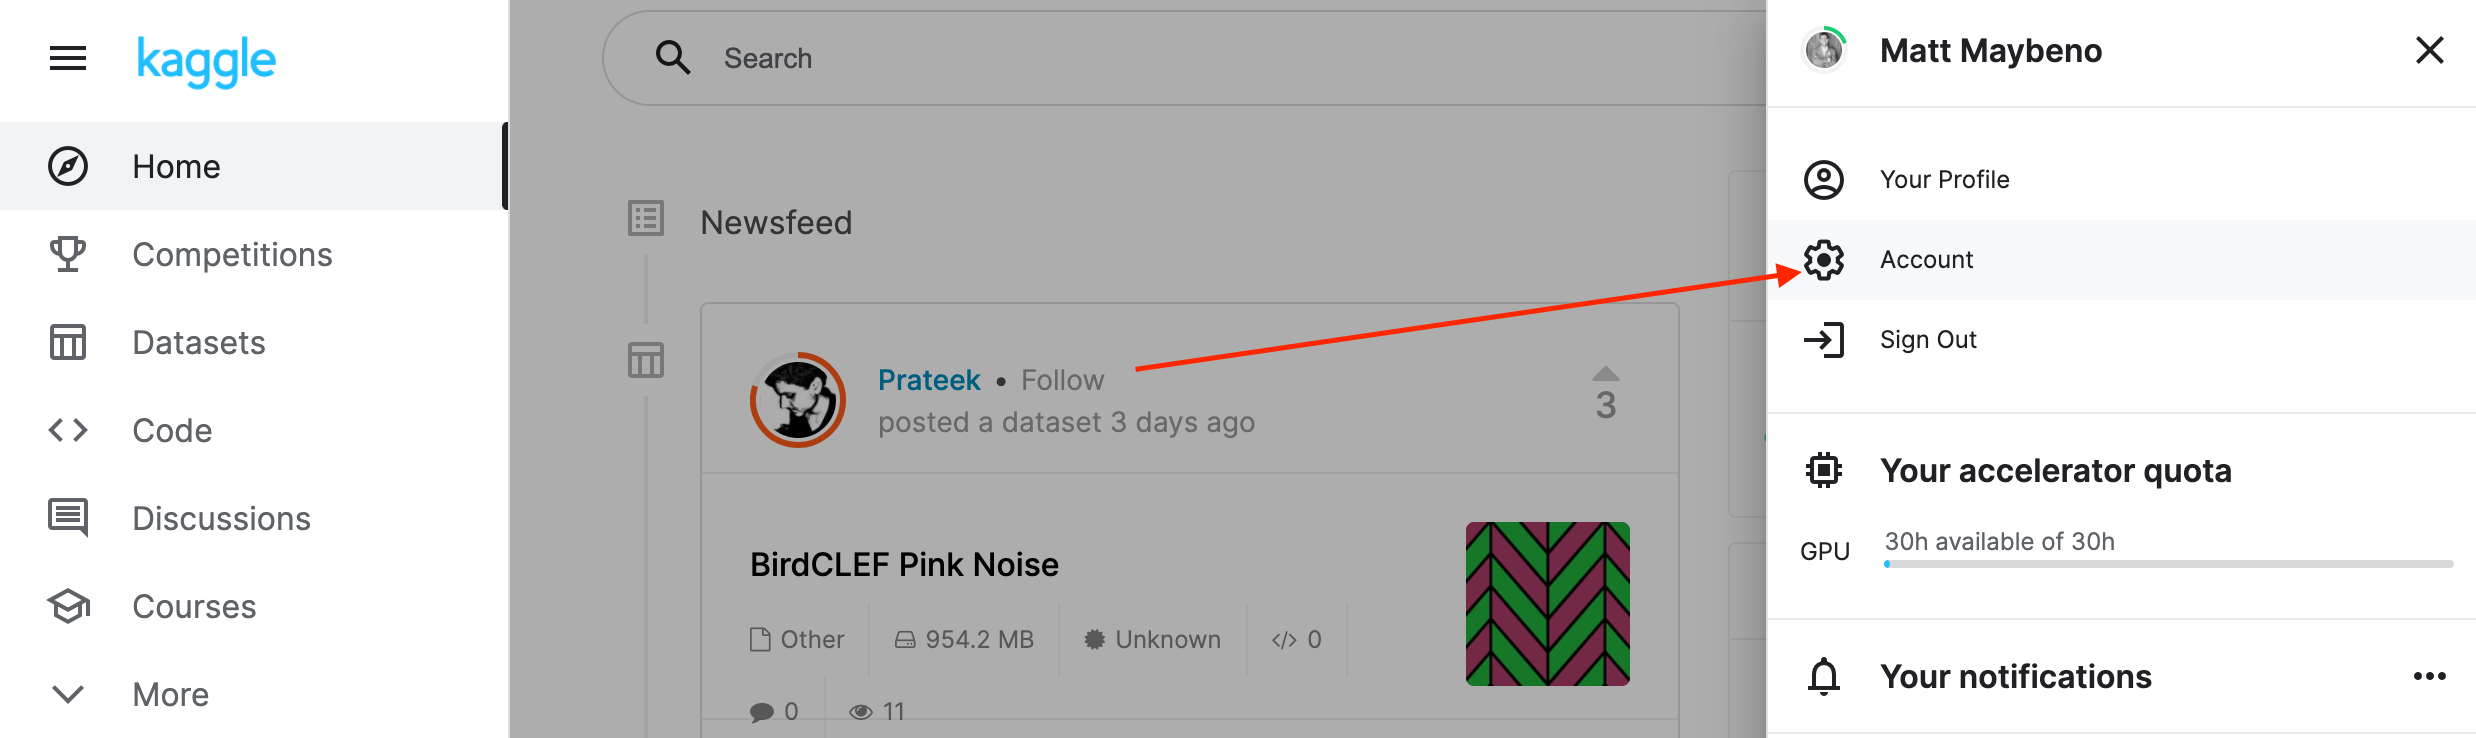
2. Scroll down to API and click Create New API Token.
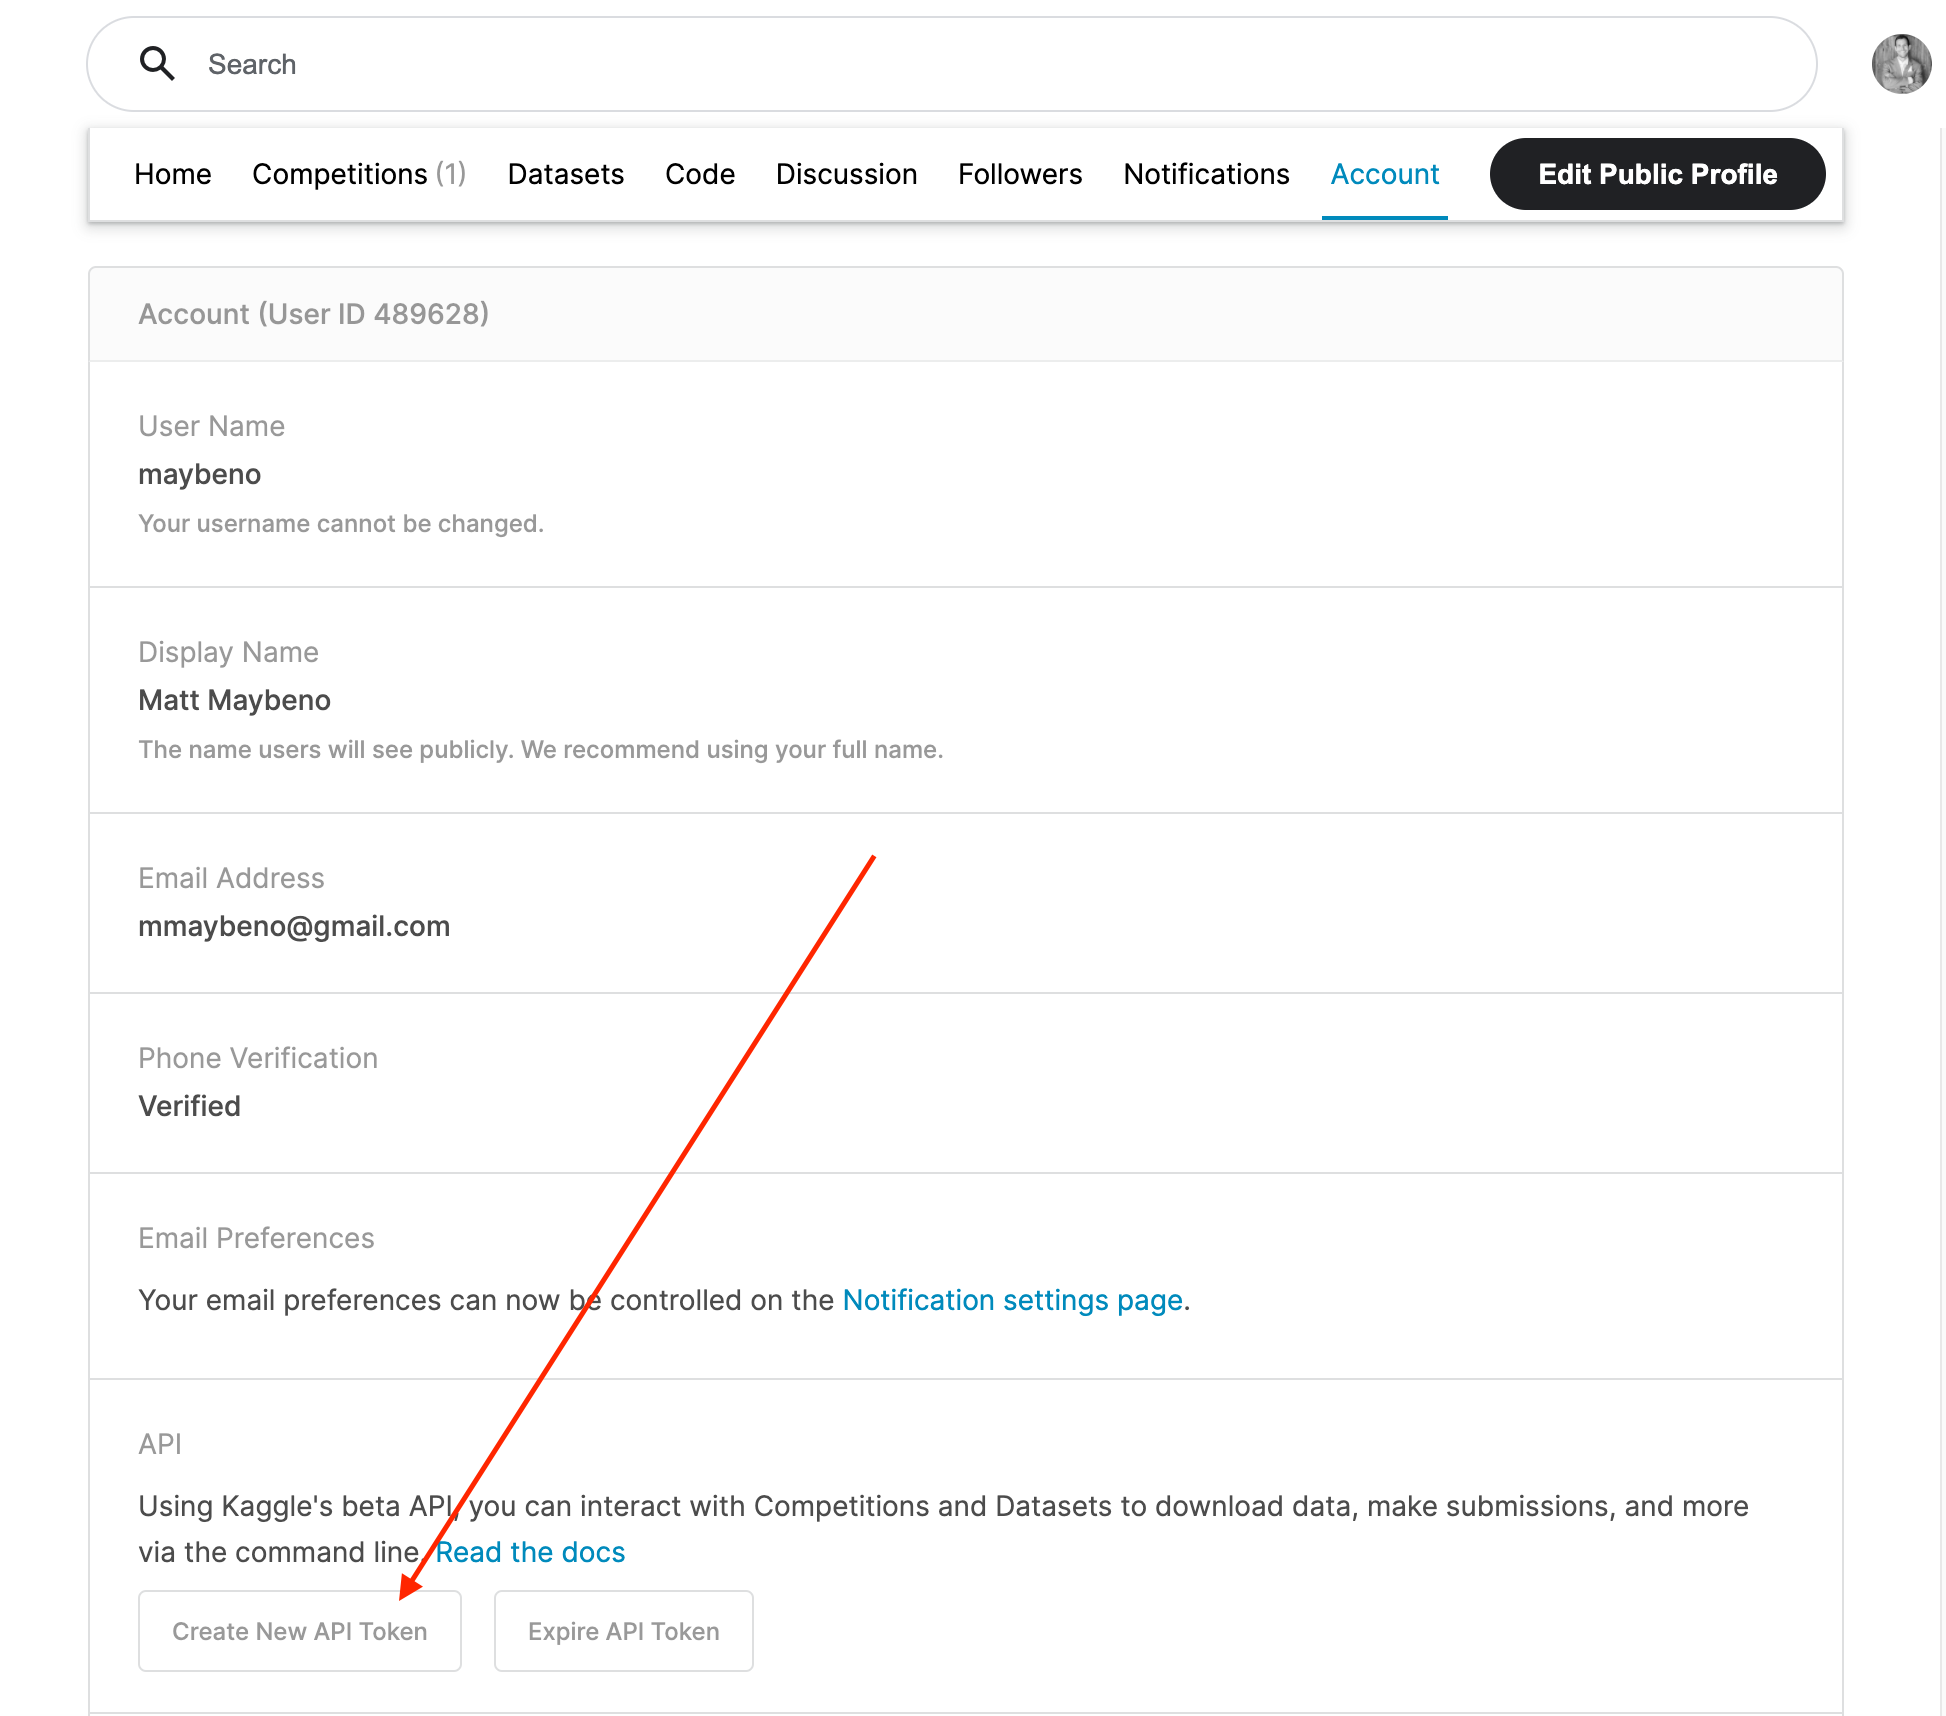
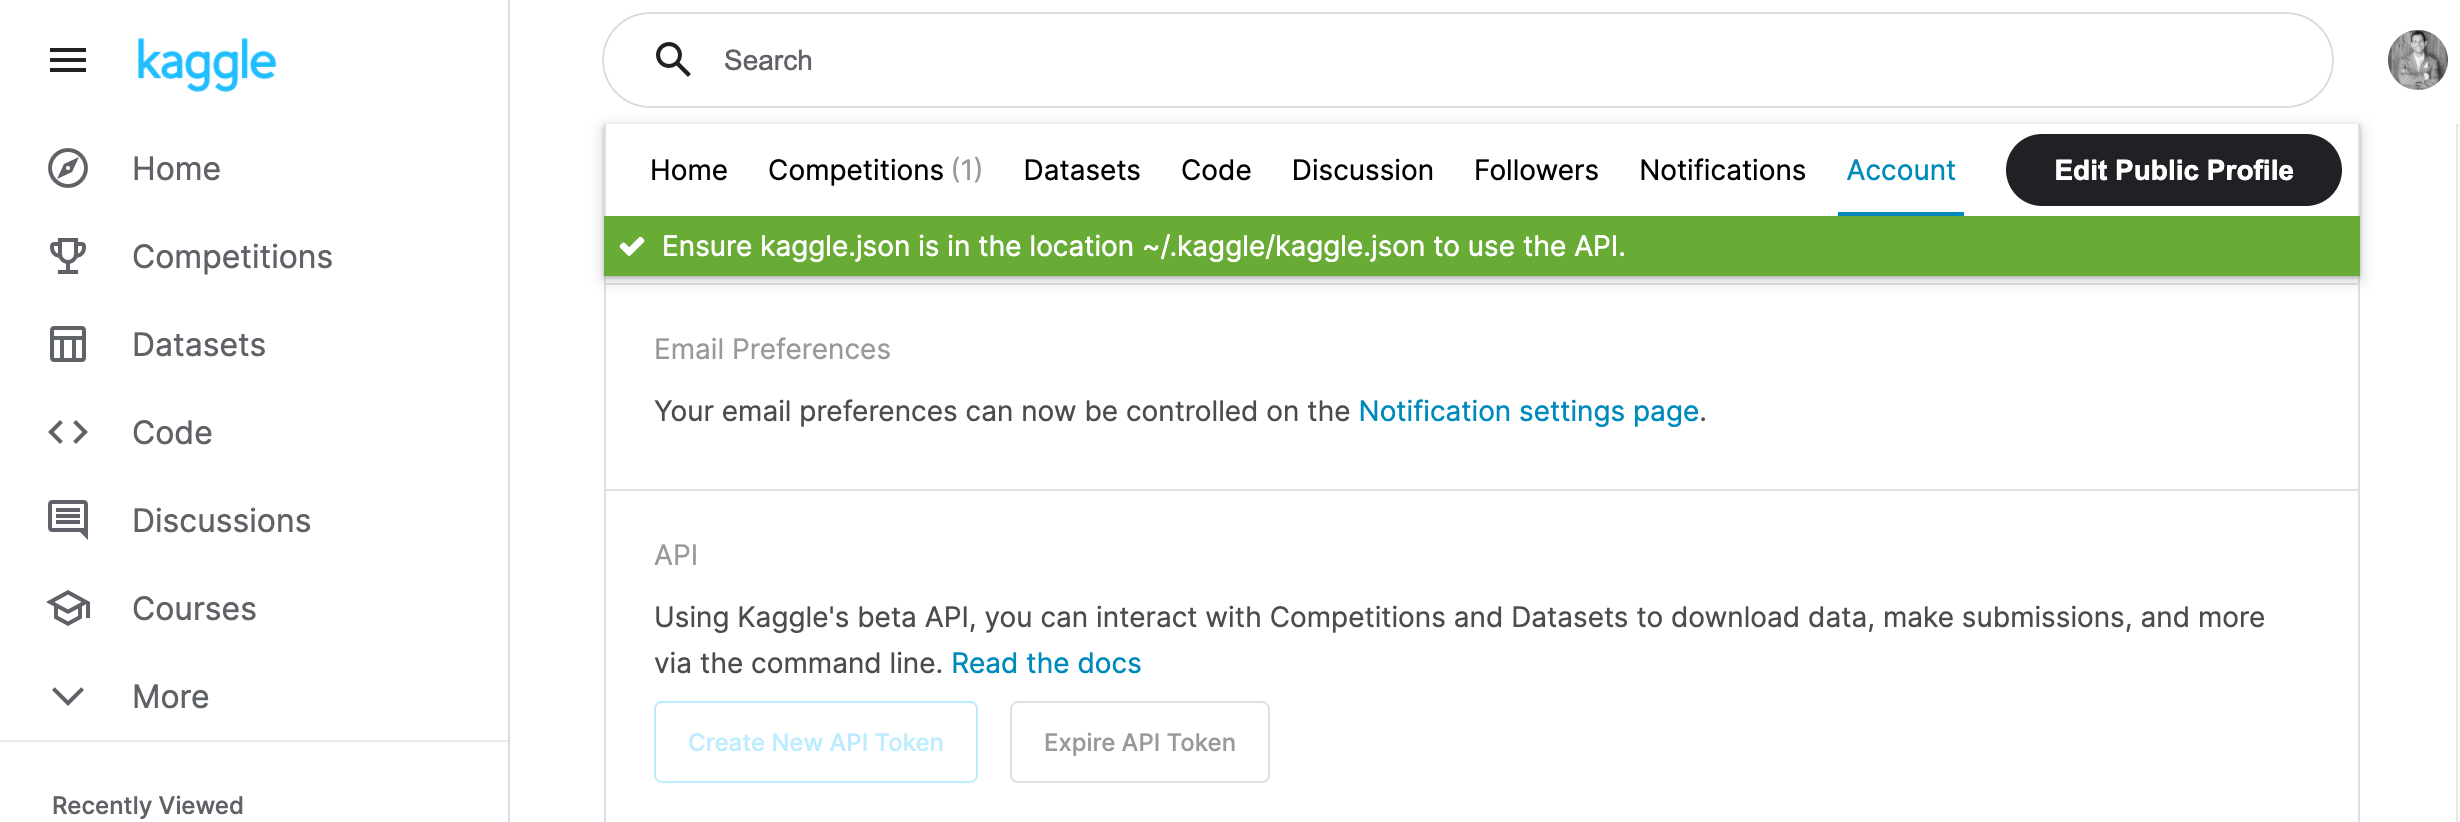
3. Open up `kaggle.json` and use the username and key.
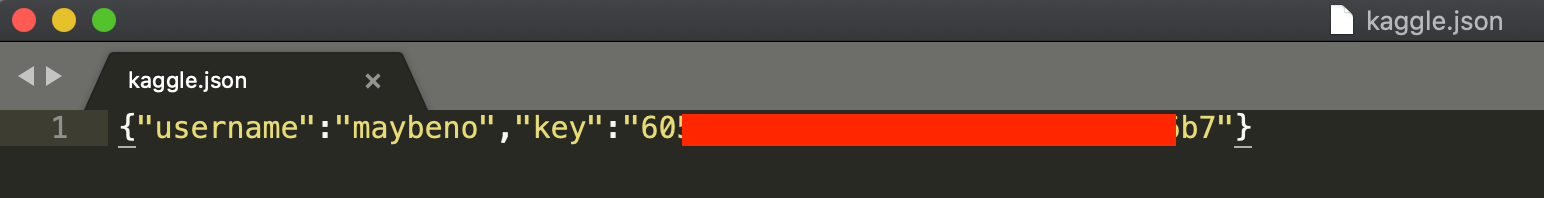

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.5.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 138.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 181.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 167.5 MB/s eta 0:00:00
     ━━━━━━━━━

In [3]:
!pip install -U kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-6.1.2-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rowanmohamed"
kaggle_key = "0c265bfc852113bda52fae4be2e1e268"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
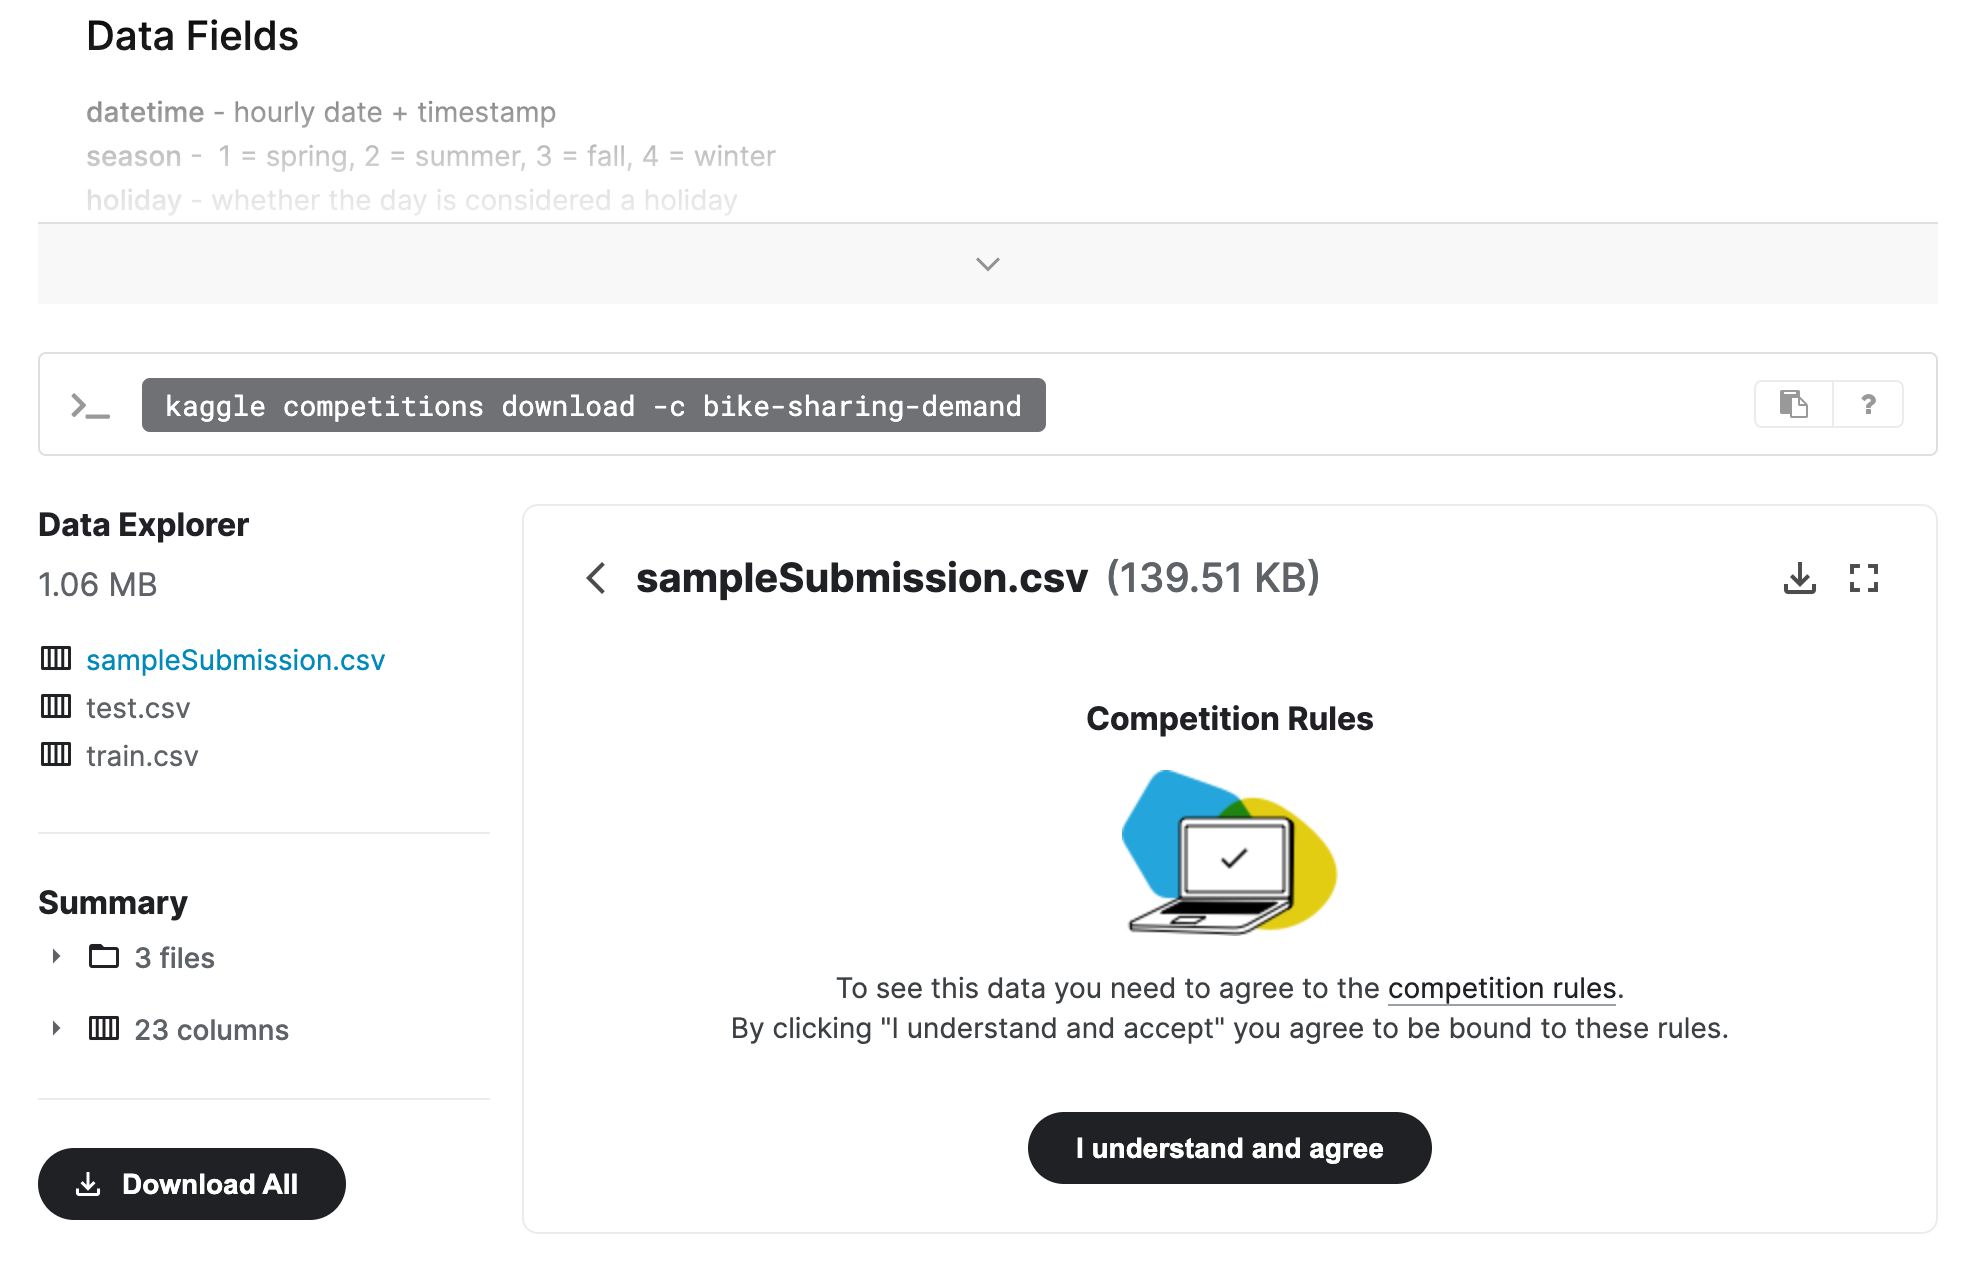

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions  download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o /root/cd0385-project-starter/project/bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /root/cd0385-project-starter/project/bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!unzip -o kaggle competitions download -c cd0385-project-starter/project/bike-sharing-demand.zip

unzip:  cannot find or open kaggle, kaggle.zip or kaggle.ZIP.


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',parse_dates=['datetime'])
train.head(-5)

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10876 2012-12-19 14:00:00       4        0           1        1  17.22   
10877 2012-12-19 15:00:00       4        0           1        1  17.22   
10878 2012-12-19 16:00:00       4        0           1        1  17.22   
10879 2012-12-19 17:00:00       4        0           1        1  16.40   
10880 2012-12-19 18:00:00       4        0           1        1  15.58   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10876  21.210        50    12.9980      33         185    218  
10877  21.210        50    19.0012      28         209    237  
10878  21.210        50    23.9994      37         297    334  
10879  20.455        50    26.0027      26         536    562  
10880  19.695        50    23.9994      23         546    569  

[10881 rows x 12 columns]

In [16]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
#train.max()
train.describe()

#train.mean()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [17]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test =  pd.read_csv('test.csv',parse_dates=['datetime'])
test.head(-5)

datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1    2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2    2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3    2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4    2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
...                  ...     ...      ...         ...      ...    ...     ...   
6483 2012-12-31 14:00:00       1        0           1        2  11.48  13.635   
6484 2012-12-31 15:00:00       1        0           1        2  11.48  14.395   
6485 2012-12-31 16:00:00       1        0           1        2  10.66  12.880   
6486 2012-12-31 17:00:00       1        0           1        2  10.66  14.395   
6487 2012-12-31 18:00:00       1        0           1        2  10.66  13.635   

      humidity  windspeed  
0           56    26.0027  
1           56     0.0000  
2           56     0.0000  
3           56    11.0014  
4           56    11.0014  
...        ...        ...  
6483        45    15.0013  
6484        45     8.9981  
6485        48    12.9980  
6486        48     6.0032  
6487        48     8.9981  

[6488 rows x 9 columns]

In [18]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [19]:
# Same thing as train and test dataset
submission =  pd.read_csv('sampleSubmission.csv',parse_dates=['datetime'])
submission.head(-5)

datetime  count
0    2011-01-20 00:00:00      0
1    2011-01-20 01:00:00      0
2    2011-01-20 02:00:00      0
3    2011-01-20 03:00:00      0
4    2011-01-20 04:00:00      0
...                  ...    ...
6483 2012-12-31 14:00:00      0
6484 2012-12-31 15:00:00      0
6485 2012-12-31 16:00:00      0
6486 2012-12-31 17:00:00      0
6487 2012-12-31 18:00:00      0

[6488 rows x 2 columns]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [23]:
features = ["datetime","season","holiday","workingday","weather","temp","atemp","humidity","windspeed","count"]


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [24]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train[features],time_limit= 600 , presets = "best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20221019_102032/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221019_102032/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Review AutoGluon's training run with ranking of models that did the best.

In [25]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.868174      13.420185  448.329317                0.000863           0.522136            3       True         15
1   RandomForestMSE_BAG_L2  -53.468050      12.588438  415.985497                0.595647          26.617580            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.850149      12.581290  397.616950                0.588500           8.249033            2       True         14
3          LightGBM_BAG_L2  -55.176989      12.235175  412.940567                0.242384          23.572651            2       True         11
4          CatBoost_BAG_L2  -55.697184      12.064938  456.194636                0.072147          66.826720            2       True         13
5        LightGBMXT_BAG_L2  -60.455636      15.662784  441.890060         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [26]:
predictions = predictor.predict(test)
predictions.head()

0    24.105190
1    41.876968
2    46.376587
3    49.172470
4    52.320457
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [27]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()


count    6493.000000
mean      100.693169
std        90.295456
min         2.934585
25%        20.459885
50%        62.834908
75%       170.494324
max       364.457336
Name: count, dtype: float64

In [28]:
# How many negative values do we have?
predictions.lt(0).sum().sum()


0

In [30]:
# Set them to zero



### Set predictions to submission dataframe, save, and submit

In [31]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 406kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-10-19 10:33:41  first raw submission  complete  1.81080      1.81080       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

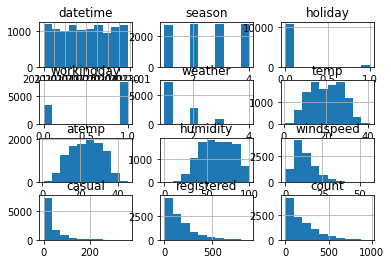

In [34]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [35]:
# create a new feature
train['hour']  = train['datetime'].dt.hour
train['day']   = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year']  = train['datetime'].dt.year

test['hour']  = test['datetime'].dt.hour
test['day']   = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year']  = test['datetime'].dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [36]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [38]:
# View are new feature
train.head(-5)

datetime season  holiday  workingday weather   temp   atemp  \
0     2011-01-01 00:00:00      1        0           0       1   9.84  14.395   
1     2011-01-01 01:00:00      1        0           0       1   9.02  13.635   
2     2011-01-01 02:00:00      1        0           0       1   9.02  13.635   
3     2011-01-01 03:00:00      1        0           0       1   9.84  14.395   
4     2011-01-01 04:00:00      1        0           0       1   9.84  14.395   
...                   ...    ...      ...         ...     ...    ...     ...   
10876 2012-12-19 14:00:00      4        0           1       1  17.22  21.210   
10877 2012-12-19 15:00:00      4        0           1       1  17.22  21.210   
10878 2012-12-19 16:00:00      4        0           1       1  17.22  21.210   
10879 2012-12-19 17:00:00      4        0           1       1  16.40  20.455   
10880 2012-12-19 18:00:00      4        0           1       1  15.58  19.695   

       humidity  windspeed  casual  registered  count  hour  day  month  year  
0            81     0.0000       3          13     16     0    1      1  2011  
1            80     0.0000       8          32     40     1    1      1  2011  
2            80     0.0000       5          27     32     2    1      1  2011  
3            75     0.0000       3          10     13     3    1      1  2011  
4            75     0.0000       0           1      1     4    1      1  2011  
...         ...        ...     ...         ...    ...   ...  ...    ...   ...  
10876        50    12.9980      33         185    218    14   19     12  2012  
10877        50    19.0012      28         209    237    15   19     12  2012  
10878        50    23.9994      37         297    334    16   19     12  2012  
10879        50    26.0027      26         536    562    17   19     12  2012  
10880        50    23.9994      23         546    569    18   19     12  2012  

[10881 rows x 16 columns]

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

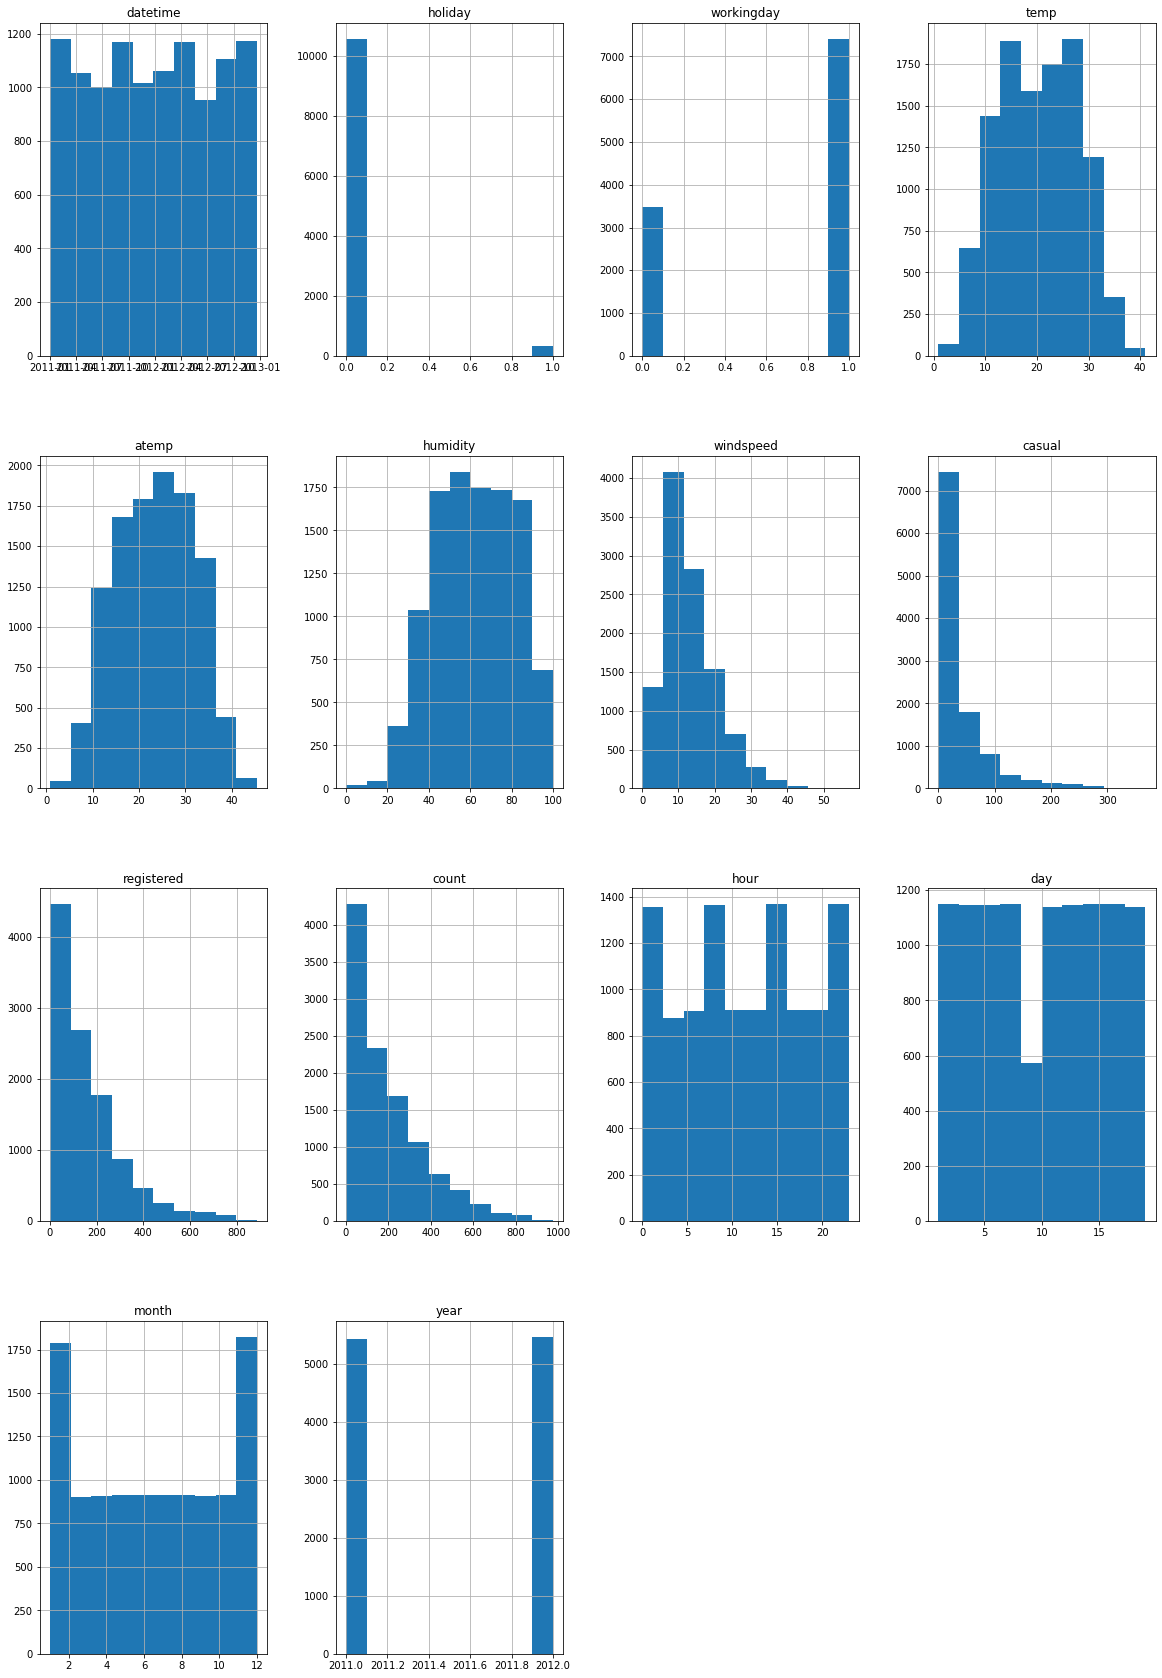

In [42]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,30))

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  year        10886 non-null  int64         
dtypes: category(2), dateti

## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
features=["season","holiday","workingday","weather","temp","humidity","windspeed","count","hour","day","month","year"]

predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train[features], time_limit = 600 , presets= "best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20221019_104924/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221019_104924/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [59]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.920185      25.432863  558.069793                0.000940           0.406430            3       True         16
1      WeightedEnsemble_L2  -36.125563      22.379516  353.913308                0.001208           0.819419            2       True          9
2     ExtraTreesMSE_BAG_L2  -36.237234      23.834068  405.630763                0.604785           7.651797            2       True         14
3          CatBoost_BAG_L2  -36.243574      23.329120  452.367391                0.099837          54.388425            2       True         13
4          LightGBM_BAG_L2  -36.365022      23.428248  418.978682                0.198965          20.999716            2       True         11
5   RandomForestMSE_BAG_L2  -36.856797      23.840127  423.480413         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -122.85654908089322,
  'KNeighborsDist_BAG_L1': -118.5978900057019

In [60]:
predictor = predictor_new_features.predict(test)
predictor.head()

0    13.564806
1     5.808104
2     4.795570
3     4.551102
4     4.458563
Name: count, dtype: float32

In [61]:
# Remember to set all negative values to zero
predictor = predictor.clip(lower=0)


In [74]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission_new_features["count"] = predictor
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [75]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 256kB/s]
Successfully submitted to Bike Sharing Demand

In [76]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-10-19 11:14:34  new features          complete  0.46051      0.46051       
submission.csv               2022-10-19 10:33:41  first raw submission  complete  1.81080      1.81080       


In [78]:
import autogluon.core as ag

nn_options = {  
    'num_epochs': 10, 
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  
                  }  


hyperparameter_tune_kwargs = {  
    'num_trials': 5,
    'scheduler' : 'local',
    'searcher': "auto",
}

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [79]:
predictor_new_hpo = TabularPredictor(label='count',eval_metric="root_mean_squared_error").fit(train[features], time_limit= 600 , presets = "best_quality",hyperparameters = hyperparameters,hyperparameter_tune_kwargs = hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20221019_111646/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221019_111646/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [80]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -40.977729       2.387369  347.872907                0.000859           0.758281            3       True         16
1         LightGBM_BAG_L2/T3  -41.314359       1.515954  214.531182                0.149975          17.267238            2       True         11
2         LightGBM_BAG_L2/T2  -41.420082       1.478261  212.901429                0.112282          15.637484            2       True         10
3         LightGBM_BAG_L2/T1  -41.436223       1.506471  213.672797                0.140493          16.408852            2       True          9
4         LightGBM_BAG_L2/T5  -41.781310       1.523443  213.789591                0.157465          16.525646            2       True         13
5        WeightedEnsemble_L2  -42.621871       0.640025   91.3

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -44.84028812395

In [81]:
predictor = predictor_new_hpo.predict(test)
predictor.head()

0    11.074966
1     7.195889
2     6.922987
3     6.898524
4     6.978281
Name: count, dtype: float32

In [82]:
# Remember to set all negative values to zero
predictor = predictor.clip(lower=0)


In [83]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission_new_features["count"] = predictor
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [84]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 140k/140k [00:00<00:00, 226kB/s]
Successfully submitted to Bike Sharing Demand

In [85]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-10-19 11:24:10  new features with hyperparameters  complete  4.76188      4.76188       
submission_new_features.csv  2022-10-19 11:14:34  new features                       complete  0.46051      0.46051       
submission.csv               2022-10-19 10:33:41  first raw submission               complete  1.81080      1.81080       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

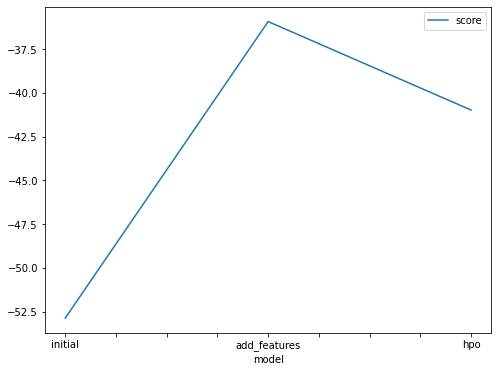

In [86]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.868174, -35.920185, -40.977729]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

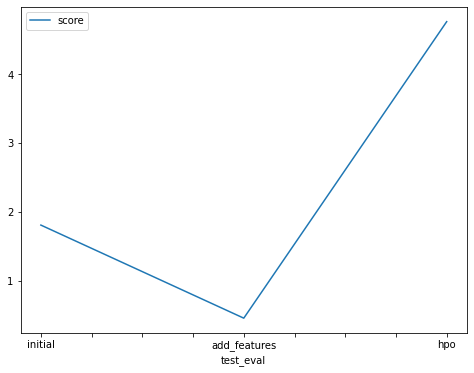

In [87]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.81080, 0.46051, 4.76188 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [89]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "GBM:'num_boost_round': 100,'num_leaves'(lower=26, upper=66, default=36)"],
    "hpo2": ["default", "default", "NN_TORCH (num_epochs': 10), activation('relu', 'softrelu', 'tanh')"],
    "hpo3": ["default", "default", "searcher: 'auto', num_trials: 5,scheduler: local"],
    "score": [1.81080, 0.46051, 4.76188 ]
})

model  \
0       initial   
1  add_features   
2           hpo   

                                                                      hpo1  \
0                                                                  default   
1                                                                  default   
2  GBM:'num_boost_round': 100,'num_leaves'(lower=26, upper=66, default=36)   

                                                                 hpo2  \
0                                                             default   
1                                                             default   
2  NN_TORCH (num_epochs': 10), activation('relu', 'softrelu', 'tanh')   

                                               hpo3    score  
0                                           default  1.81080  
1                                           default  0.46051  
2  searcher: 'auto', num_trials: 5,scheduler: local  4.76188